In [38]:
import pandas as pd

# Load the spreadsheet
xl = pd.ExcelFile('mentalHealthByState.xls')

# Load a sheet by its name
df = xl.parse('Table 2.3_Proportions')

MentalConditions = df.iloc[36, 1 : 10]

In [39]:
print(MentalConditions)

Unnamed: 1    19.1
Unnamed: 2    20.2
Unnamed: 3    22.7
Unnamed: 4    19.9
Unnamed: 5    17.8
Unnamed: 6    21.7
Unnamed: 7    15.9
Unnamed: 8    20.8
Unnamed: 9    20.1
Name: 36, dtype: object


In [47]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file('ne_50m_admin_1_states_provinces.shp')

# Filter to get only Australia data
gdf_australia = gdf[gdf['admin'] == 'Australia']

# Save to GeoJSON
gdf_australia.to_file("australia.geojson", driver='GeoJSON')

In [49]:
print(australia.columns)
print(mental_health_data.columns)

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)
Index(['state', 'value'], dtype='object')


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:809: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


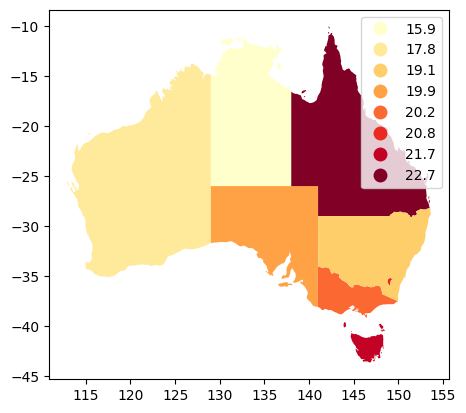

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the spreadsheet
xl = pd.ExcelFile('mentalHealthByState.xls')

# Load a sheet by its name
df = xl.parse('Table 2.3_Proportions')

# Select the 36th row and columns 1 to 8
MentalConditions = df.iloc[36, 1:9]

# The state names
state_names = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 'Tasmania', 'Northern Territory', 'Australian Capital Territory']

# Replace the index of MentalConditions with state_names
MentalConditions.index = state_names

# Convert to DataFrame
mental_health_data = pd.DataFrame({
    'state': MentalConditions.index,
    'value': MentalConditions.values
})

# Load Australia GeoJSON file
australia = gpd.read_file('australia.geojson')

# If the 'state' column doesn't exist in australia GeoDataFrame, use the appropriate column. For example 'name'.
australia = australia.rename(columns={'name': 'state'})

# Merge GeoDataFrame with DataFrame
merged = australia.set_index('state').join(mental_health_data.set_index('state'))

# Plot
fig, ax = plt.subplots(1, 1)
merged.plot(column='value', ax=ax, legend=True, cmap='YlOrRd')  # 'value' is the column with your data
plt.show()